# Student Habits Performance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("student habits performance.csv")

In [3]:
df.head(10)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
5,S1005,24,Male,7.2,1.3,0.0,No,82.9,7.4,Fair,1,Master,Average,4,No,100.0
6,S1006,21,Female,5.6,1.5,1.4,Yes,85.8,6.5,Good,2,Master,Poor,4,No,89.8
7,S1007,21,Female,4.3,1.0,2.0,Yes,77.7,4.6,Fair,0,Bachelor,Average,8,No,72.6
8,S1008,23,Female,4.4,2.2,1.7,No,100.0,7.1,Good,3,Bachelor,Good,1,No,78.9
9,S1009,18,Female,4.8,3.1,1.3,No,95.4,7.5,Good,5,Bachelor,Good,10,Yes,100.0


### Basic EDA 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [5]:
df['parental_education_level'] = df['parental_education_level'].fillna('None')

In [6]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [7]:
df.shape

(1000, 16)

In [8]:
df.columns

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')

### Dataset information
In this data set we have null-Values in `parental_education_level` column. I am considering that these peopel are undeucated. The shape of dataset is `1000 * 16`. Where 7 columns are object and others are int & float (64). This data contains huge amount of information including their parents info.

We can also find the family backgroun of the student basd on their parents info.

---

In [9]:
# finding average screen time per student
avg_src_time = (df['social_media_hours'] + df['netflix_hours']).mean()
print(f"Average screen time is: {avg_src_time} hrs.")

Average screen time is: 4.325199999999999 hrs.


In [10]:
# finding average attendance of student
avg_atds = df['attendance_percentage'].mean()
print(f"Average attendence is: {avg_atds}")

Average attendence is: 84.1317


In [11]:
# finding averge exam scor of student
avg_exam_score = df['exam_score'].mean()
print(f"Average exam score is: {avg_exam_score}%")

Average exam score is: 69.6015%


In [12]:
# finding average sleep hours of student
avg_sleep = df['sleep_hours'].mean()
print(f"{avg_sleep}hrs, & recomended 8+ hrs")

6.4701hrs, & recomended 8+ hrs


In [13]:
# finding avegare mental helth of student
avg_mental_hlt = df['mental_health_rating'].mean()
print(f"{avg_mental_hlt} and recomended 7 + out of 10")

5.438 and recomended 7 + out of 10


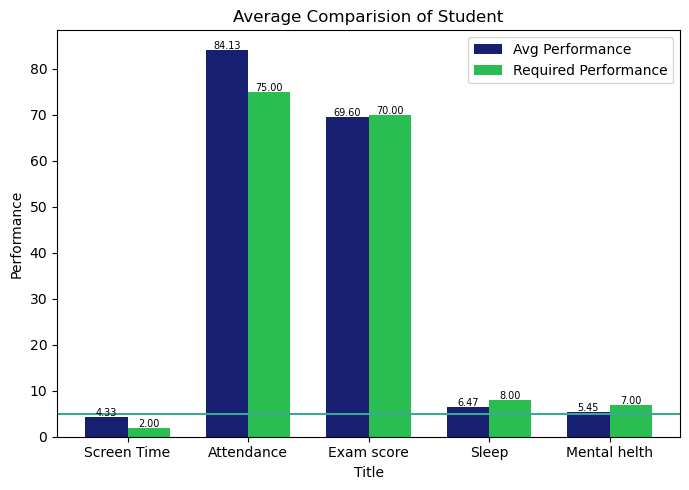

In [52]:
data = [4.32519, 84.1317, 69.6015, 6.47, 5.45]
normal = [2, 75, 70, 8, 7]
label = ["Screen Time", "Attendance", "Exam score", "Sleep", "Mental helth"]

width = 0.35
x = np.arange(len(label))

fig, ax = plt.subplots(figsize = (7, 5))
bar1 = ax.bar(x - width/2, data, width, label = "Avg Performance", color = "#171f70")
bar2 = ax.bar(x + width/2, normal, width, label = "Required Performance", color = "#29bd52")

plt.title("Average Comparision of Student")
plt.xlabel("Title")
plt.ylabel("Performance")
plt.xticks(x, label)
plt.legend()
plt.tight_layout()

for bar in bar1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval +0.2, f"{yval:.2f}", ha = 'center', fontsize= 7)

for bar in bar2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval +0.2, f"{yval:.2f}", ha = 'center', fontsize= 7)
ax.axhline(
    y = 5,
    color = '#3ca797',
    linestyle = '-',
    linewidth = 1.5,
    label = "Reference = 5"
)
plt.show()

### Based on Raw data:
We can see the screen time of student is much higher **(`4.33 hours`)** than normally recomended for students **(`2 hours`)**. Which is affecting their personal life, but we acn also observe this habit cannot affect their accedmic life as much. For example; **`75%`** attendance is same for student which they full-fill. **`70%`** marks at the graduation level is enough which they likely full-fill.

But their personal life is getting destroyed. Their sleep cycle is disturbed, and mental health which is very important is lower **(`5.45`)** than safe level **`7+`**.

---

In [15]:
# finding average attendence of student who do part time job
job_yes = df[df['part_time_job'] == "Yes"]
atds_prt = job_yes['attendance_percentage'].mean()
print(f"Attendence of student do part time job student: {atds_prt}")

Attendence of student do part time job student: 83.38186046511628


In [16]:
# finding attendence of student don't do part time job
job_no = df[df['part_time_job'] == "No"]
atds_prt_no = job_no['attendance_percentage'].mean()
print(f"Attendence of student don't do part time job: {atds_prt_no}")

Attendence of student don't do part time job: 84.33707006369427


In [17]:
# finding screen time who do part tiem job
src_prt_yes = (job_yes['social_media_hours'] + job_yes['netflix_hours']).mean()
src_prt_yes

4.391627906976744

In [18]:
# finding screen time who don't do part time job
src_prt_no = (job_no['social_media_hours'] + job_no['netflix_hours']).mean()
src_prt_no

4.307006369426752

In [19]:
job_yes.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
6,S1006,21,Female,5.6,1.5,1.4,Yes,85.8,6.5,Good,2,Master,Poor,4,No,89.8
7,S1007,21,Female,4.3,1.0,2.0,Yes,77.7,4.6,Fair,0,Bachelor,Average,8,No,72.6
12,S1012,19,Female,3.7,2.1,0.4,Yes,81.1,4.5,Fair,1,Bachelor,Good,9,No,76.9
18,S1018,24,Other,2.0,4.9,2.9,Yes,88.3,7.1,Good,2,High School,Good,5,No,43.9
23,S1023,24,Female,1.1,4.1,1.4,Yes,90.0,9.0,Fair,6,Bachelor,Good,1,No,43.7


In [20]:
# finding sleep hours of student who do part time job
do_sleep = job_yes['sleep_hours'].mean()
print(do_sleep, "hrs")

6.473953488372094 hrs


In [21]:
# finding sleep hours of student don't do part time job
dont_sleep = job_no['sleep_hours'].mean()
print(dont_sleep, "hrs")

6.469044585987261 hrs


In [22]:
# finding mental health score who do part time job
do_mental_hlt = job_yes['mental_health_rating'].mean()
do_mental_hlt

5.511627906976744

In [23]:
# finding mental health score who don't do part time job
dont_mental_hlt = job_no['mental_health_rating'].mean()
dont_mental_hlt

5.4178343949044585

In [24]:
# finding exam sore of student based on job
do_exam = job_yes['exam_score'].mean()
dont_exam = job_no['exam_score'].mean()
print("Do :", do_exam)
print("Don't :", dont_exam)

Do : 68.74325581395348
Don't : 69.83656050955413


In [25]:
yes_count = df['part_time_job'].value_counts().get('Yes',0)
no_count = df['part_time_job'].value_counts().get('No', 0)
per_yes_count = (yes_count/1000)*100
per_no_count = (no_count/1000)*100

print(per_yes_count,"%")
print(per_no_count,"%")

21.5 %
78.5 %


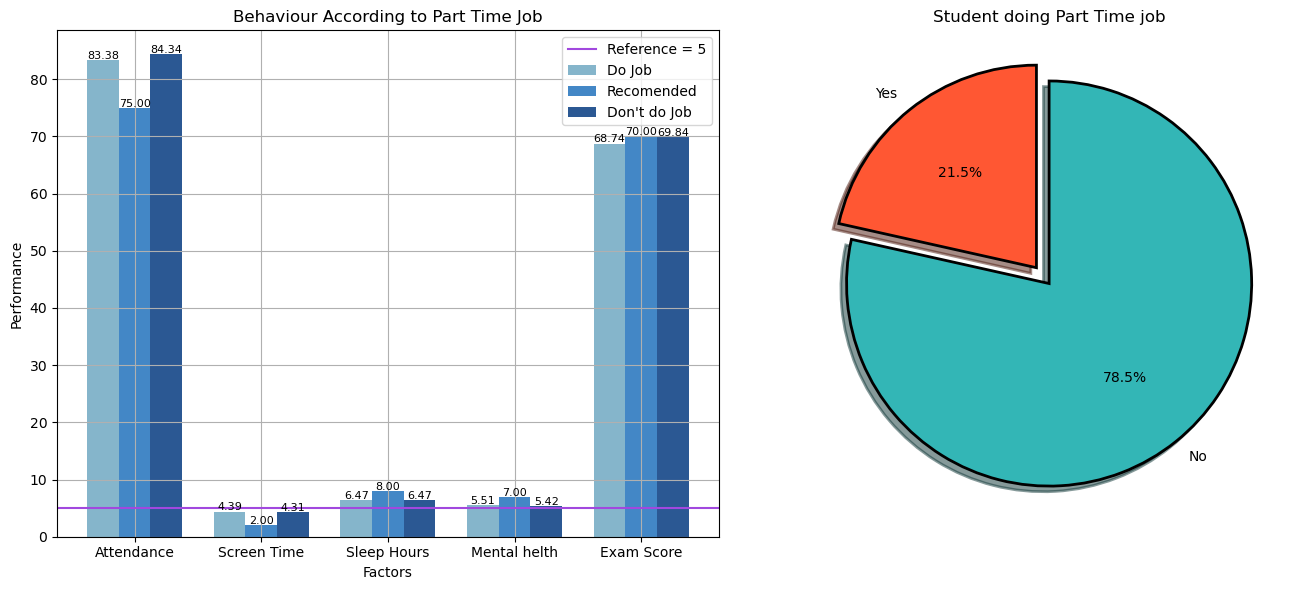

In [73]:
# Bar chart data
dos_bar = [83.381, 4.3916, 6.4739, 5.5116, 68.7432]
dont_bar = [84.337, 4.3070, 6.4690, 5.4178, 69.8365]
recomended = [75, 2, 8, 7, 70]
label = ['Attendance', 'Screen Time', 'Sleep Hours', 'Mental helth', 'Exam Score']

# Pie chart data
data = [215, 785]
label_pie = ["Yes", "No"]
colors = ["#FF5733" ,"#33b6b6"]

width = 0.25
x = np.arange(len(label))

# Creating subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ----------- BAR CHART ----------- #
ax = axes[0]
bar1 = ax.bar(x - width, dos_bar, width, label = "Do Job", color = "#85b5cb")
bar2 = ax.bar(x, recomended, width, label = "Recomended", color = "#4387c6")
bar3 = ax.bar(x + width, dont_bar, width, label = "Don't do Job", color = "#2b5893")

ax.set_title("Behaviour According to Part Time Job")
ax.set_xlabel("Factors")
ax.set_ylabel("Performance")
ax.grid(True)
ax.set_xticks(x)
ax.set_xticklabels(label)

# Add bar labels
for bars in [bar1, bar2, bar3]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2,
            yval + 0.2,
            f"{yval:.2f}",
            ha='center',
            fontsize=8
        )
ax.axhline(
    y = 5,
    color = '#a148de',
    linestyle = '-',
    linewidth = 1.5,
    label = "Reference = 5"
)
ax.legend()

# ----------- PIE CHART ----------- #
ax = axes[1]
ax.pie(data,
       labels = label_pie,
       explode=[0.1, 0],
       shadow=True,
       autopct='%1.1f%%',
       startangle=90,
       wedgeprops={'edgecolor':'black', 'linewidth':2, 'linestyle':'-'},
       colors = colors
      )

ax.set_title("Student doing Part Time job")
plt.tight_layout()
plt.show()

### Based on Student doing part time job:
Based on this insights we can say that the student who is doing part time and student who is not doing part time job they both shows that **same behaviour**. Their each and every factors are same, with some minor difference. 
> The only insight is the number of Student who do part time job `21.5%` are less that the students who don't do part time job `78.5%`.
> So in conclusion we can say the part time job dosen't affect their life. Which indicates the majority of student have strong fanincial background.

---

In [27]:
df['screen_time'] = df['social_media_hours'] + df['netflix_hours']

In [28]:
df.drop(columns = ['student_id', 'netflix_hours', 'social_media_hours'], inplace=True)

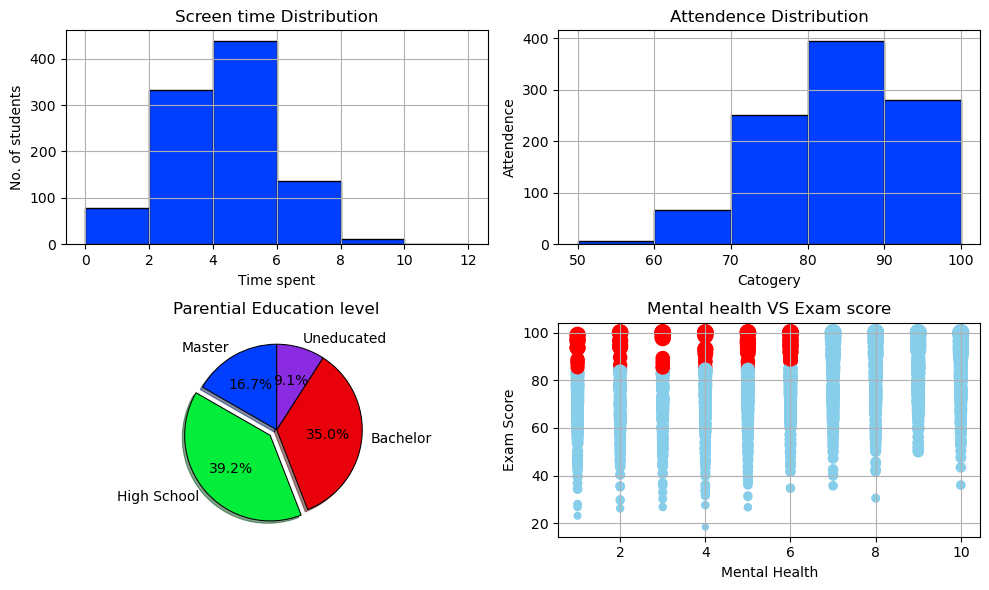

In [77]:
# Histogram Data
bins1 = [0, 2, 4, 6, 8, 10, 12]
bins2 = [50, 60, 70, 80, 90, 100]

# Pie data
edu_num = [167, 392, 350, 91]
edu_label = ['Master', 'High School', 'Bachelor', 'Uneducated']

# Scatter plot data
colors = ['red' if score > 85 and health < 7 else 'skyblue' 
          for score, health in zip(df['exam_score'], df['mental_health_rating'])
         ]
size = [score * 1.2 if score > 90 else score for score in df['exam_score']]

# Creating subplots: 2 row, 2 columns
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
plt.style.use('seaborn-v0_8-bright')

# ----------- Histogram 1 ----------- #
ax = axes[0, 0]
ax.hist(df['screen_time'],
         bins = bins1,
         edgecolor = 'black'
        )
ax.set_title("Screen time Distribution")
ax.set_xlabel("Time spent")
ax.set_ylabel("No. of students")
ax.grid(True)


# ----------- Histogram 2 ----------- #
ax = axes[0, 1]
ax.hist(df['attendance_percentage'],
         bins = bins2,
         edgecolor = 'black'
        )
ax.set_title("Attendence Distribution")
ax.set_xlabel("Catogery")
ax.set_ylabel("Attendence")
ax.grid(True)

# ----------- Pie chart ----------- #
ax = axes[1, 0]

# colors = ["#8b46b9", "#c0d944", "#6a9de3", "#f13838"]
ax.pie(edu_num,
        labels = edu_label,
        wedgeprops={'edgecolor':'black', 'linewidth':0.75, 'linestyle':'-'},
        explode = [0, 0.1, 0, 0],
        shadow=True,
        startangle=90,
        autopct='%1.1f%%',
        # colors = colors
       )
ax.set_title("Parential Education level")

# ----------- Scatter plot ----------- #
ax = axes[1, 1]
ax.scatter(df['mental_health_rating'], df['exam_score'], c=colors, s= size)
ax.set_title("Mental health VS Exam score")
ax.set_xlabel("Mental Health")
ax.set_ylabel("Exam Score")
ax.grid(True)

plt.tight_layout()
plt.show()

### Based on Raw data:
This patter is weird, normall a person whoes mental helth is good he performs well. But here we can see most of student whoes mental helth is below normal level (`7/10`) are still scoring good marks (`85+ to 100`). And majority parents are High School educated (`39.2%`) or Bachelor (`35%`). Where `9.1%` parents are uneducated, remaning `16.7%` parents are highly educated at masters level.

But we can also see the high range of students are attending their classes properly in range of `70 - 100 %` attendence. And majority of group spends `2 - 6 Hrs.` a day on Screen (Social media / Netflix).

---

In [30]:
# finding parential education effect
edu_master = df[df['parental_education_level'] == "Master"]
edu_master_val = df['parental_education_level'].value_counts().get("Master", 0)

edu_bachelor = df[df['parental_education_level'] == "Bachelor"]
edu_bach_val = df['parental_education_level'].value_counts().get('Bachelor', 0)

edu_school = df[df['parental_education_level'] == "High School"]
edu_school_val = df['parental_education_level'].value_counts().get('High School', 0)

edu_None = df[df['parental_education_level'] == "None"]
edu_None_val = df['parental_education_level'].value_counts().get('None', 0)

In [31]:
edu_None.reset_index(drop = True, inplace = True)
edu_None.head()

,age,gender,study_hours_per_day,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,screen_time
0,19,Female,4.6,No,77.6,5.8,Fair,1,None,Good,3,No,63.3,4.5
1,18,Female,4.0,No,99.5,5.8,Poor,2,None,Average,5,No,70.7,2.0
2,23,Female,2.5,No,83.5,7.0,Good,4,None,Good,8,Yes,59.7,5.6
3,21,Female,2.3,No,100.0,6.4,Fair,6,None,Good,1,No,66.9,1.4
4,22,Male,4.1,No,85.1,5.8,Good,4,None,Good,5,No,70.2,5.5


In [32]:
# Average performance of those students Whoes parents are uneducated.
exam_perfo = edu_None['exam_score'].mean()
mental_hlt = edu_None['mental_health_rating'].mean()
sleep = edu_None['sleep_hours'].mean()
screen_time = edu_None['screen_time'].mean()
attendence = edu_None['attendance_percentage']. mean()
std_pday = edu_None['study_hours_per_day'].mean()


print(f"Exam Performance: {exam_perfo}")
print(f"Mental Helth: {mental_hlt}")
print(f"Sleep hours: {sleep}")
print(f"Scoical media: {screen_time}")
print(f"Attendence: {attendence}")
print(f"Study per day: {std_pday}")

Exam Performance: 70.03406593406594
Mental Helth: 5.153846153846154
Sleep hours: 6.43076923076923
Scoical media: 4.2274725274725276
Attendence: 86.64285714285714
Study per day: 3.6637362637362636


In [33]:
# Average performance of those students Whoes parents are High School Passed.
exam_perfo = edu_school['exam_score'].mean()
mental_hlt = edu_school['mental_health_rating'].mean()
sleep = edu_school['sleep_hours'].mean()
screen_time = edu_school['screen_time'].mean()
attendence = edu_school['attendance_percentage']. mean()
std_pday = edu_school['study_hours_per_day'].mean()


print(f"Exam Performance: {exam_perfo}")
print(f"Mental Helth: {mental_hlt}")
print(f"Sleep hours: {sleep}")
print(f"Scoical media: {screen_time}")
print(f"Attendence: {attendence}")
print(f"Study per day: {std_pday}")

Exam Performance: 69.54719387755102
Mental Helth: 5.4770408163265305
Sleep hours: 6.4375
Scoical media: 4.402806122448979
Attendence: 83.82270408163265
Study per day: 3.5512755102040816


In [34]:
# Average performance of those students Whoes parents are Bachelor.
exam_perfo = edu_bachelor['exam_score'].mean()
mental_hlt = edu_bachelor['mental_health_rating'].mean()
sleep = edu_bachelor['sleep_hours'].mean()
screen_time = edu_bachelor['screen_time'].mean()
attendence = edu_bachelor['attendance_percentage']. mean()
std_pday = edu_bachelor['study_hours_per_day'].mean()


print(f"Exam Performance: {exam_perfo}")
print(f"Mental Helth: {mental_hlt}")
print(f"Sleep hours: {sleep}")
print(f"Scoical media: {screen_time}")
print(f"Attendence: {attendence}")
print(f"Study per day: {std_pday}")

Exam Performance: 70.27257142857142
Mental Helth: 5.734285714285714
Sleep hours: 6.515142857142858
Scoical media: 4.263428571428571
Attendence: 84.55114285714286
Study per day: 3.505142857142858


In [35]:
# Average performance of those students Whoes parents are Master.
exam_perfo = edu_master['exam_score'].mean()
mental_hlt = edu_master['mental_health_rating'].mean()
sleep = edu_master['sleep_hours'].mean()
screen_time = edu_master['screen_time'].mean()
attendence = edu_master['attendance_percentage']. mean()
std_pday = edu_master['study_hours_per_day'].mean()


print(f"Exam Performance: {exam_perfo}")
print(f"Mental Helth: {mental_hlt}")
print(f"Sleep hours: {sleep}")
print(f"Scoical media: {screen_time}")
print(f"Attendence: {attendence}")
print(f"Study per day: {std_pday}")

Exam Performance: 68.08682634730539
Mental Helth: 4.880239520958084
Sleep hours: 6.473652694610778
Scoical media: 4.325748502994013
Attendence: 82.60958083832335
Study per day: 3.579640718562874


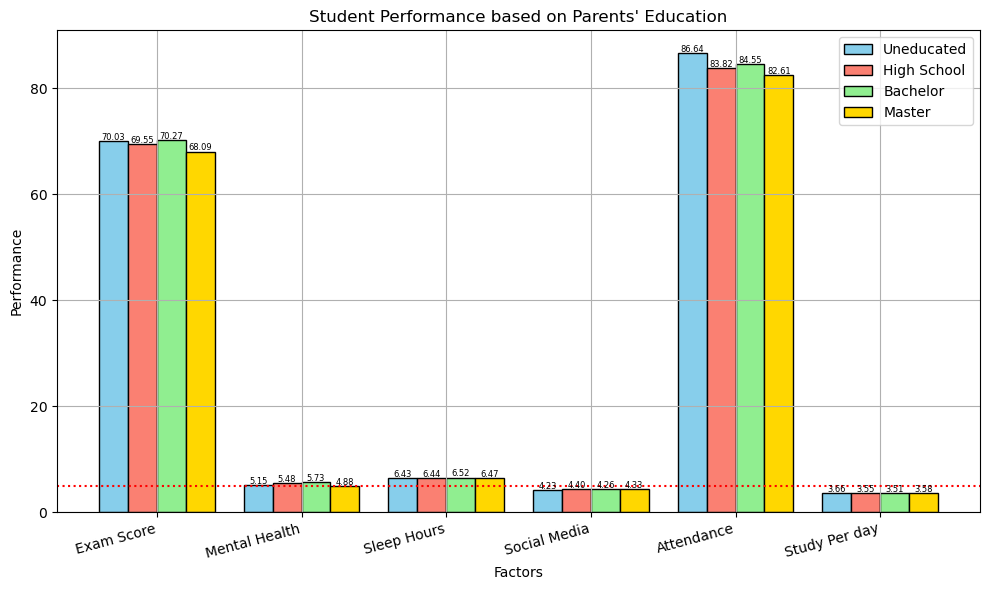

In [36]:
label = ["Exam Score", "Mental Health", "Sleep Hours", "Social Media", "Attendance", "Study Per day"]
edu_0 = [70.0340,  5.1538, 6.4307, 4.2274, 86.6428, 3.6637]
edu_sch = [69.5471, 5.4770, 6.4375, 4.4028, 83.8227, 3.5512]
edu_bach = [70.2725, 5.7342, 6.5151, 4.2634, 84.5511, 3.5051]
edu_mstr = [68.0868, 4.8802, 6.4736, 4.3257, 82.6095, 3.5796]

width = 0.2
x = np.arange(len(label))

fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(x - 1.5*width, edu_0, width, label="Uneducated",
       color='skyblue', edgecolor='black')
bar2 = ax.bar(x - 0.5*width, edu_sch, width, label="High School",
       color='salmon', edgecolor='black')
bar3 = ax.bar(x + 0.5*width, edu_bach, width, label="Bachelor",
       color='lightgreen', edgecolor='black')
bar4 = ax.bar(x + 1.5*width, edu_mstr, width, label="Master",
       color='gold', edgecolor='black')

ax.set_xticks(x)
ax.set_xticklabels(label, rotation=15, ha='right')
ax.set_title("Student Performance based on Parents' Education")
ax.set_ylabel("Performance")
ax.set_xlabel("Factors")
ax.legend()
ax.grid(True)
for bars in [bar1, bar2, bar3, bar4]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2,
            yval + 0.2,
            f"{yval:.2f}",
            ha='center',
            fontsize=6
        )
ax.axhline(
    y = 5,
    color = 'red',
    linestyle = ':',
    linewidth = 1.5,
    label = "Reference = 5"
)
plt.tight_layout()
plt.show()

### Based on parents education level:

This is not a common thing that parental education doesn't helping students. It shows that parents are not paying attention on their childs. Every factors of **student are same no matter what is parents education level**. So we can conclude that **parents education or qualification doesn't influance students life.**

---

In [ ]:
# Checking responsible gender
gender_sumry = df.groupby("gender").agg(
    {
        'exam_score':'mean',
        'screen_time':'mean'
    }
).reset_index()
gender_sumry

,gender,exam_score,screen_time
0,Female,69.741372,4.301871
1,Male,69.368344,4.320126
2,Other,70.647619,4.650000


In [38]:
gender_sumry['Responsibility_score'] = gender_sumry['exam_score']/gender_sumry['screen_time']

In [39]:
gender_sumry

,gender,exam_score,screen_time,Responsibility_score
0,Female,69.741372,4.301871,16.211869
1,Male,69.368344,4.320126,16.057019
2,Other,70.647619,4.650000,15.193036


In [42]:
# finding participation according to gender
gender_actvity = df.groupby(['gender', 'extracurricular_participation']).size()

In [43]:
result = gender_actvity.reset_index(name='Count')
result

,gender,extracurricular_participation,Count
0,Female,No,327
1,Female,Yes,154
2,Male,No,327
3,Male,Yes,150
4,Other,No,28
5,Other,Yes,14


In [44]:
# Based on gender mental health
gender_hlt = df.groupby("gender")['mental_health_rating'].mean().reset_index()
gender_hlt

,gender,mental_health_rating
0,Female,5.453222
1,Male,5.419287
2,Other,5.476190


C:\Users\pradip\AppData\Local\Temp\ipykernel_1708\2178147754.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


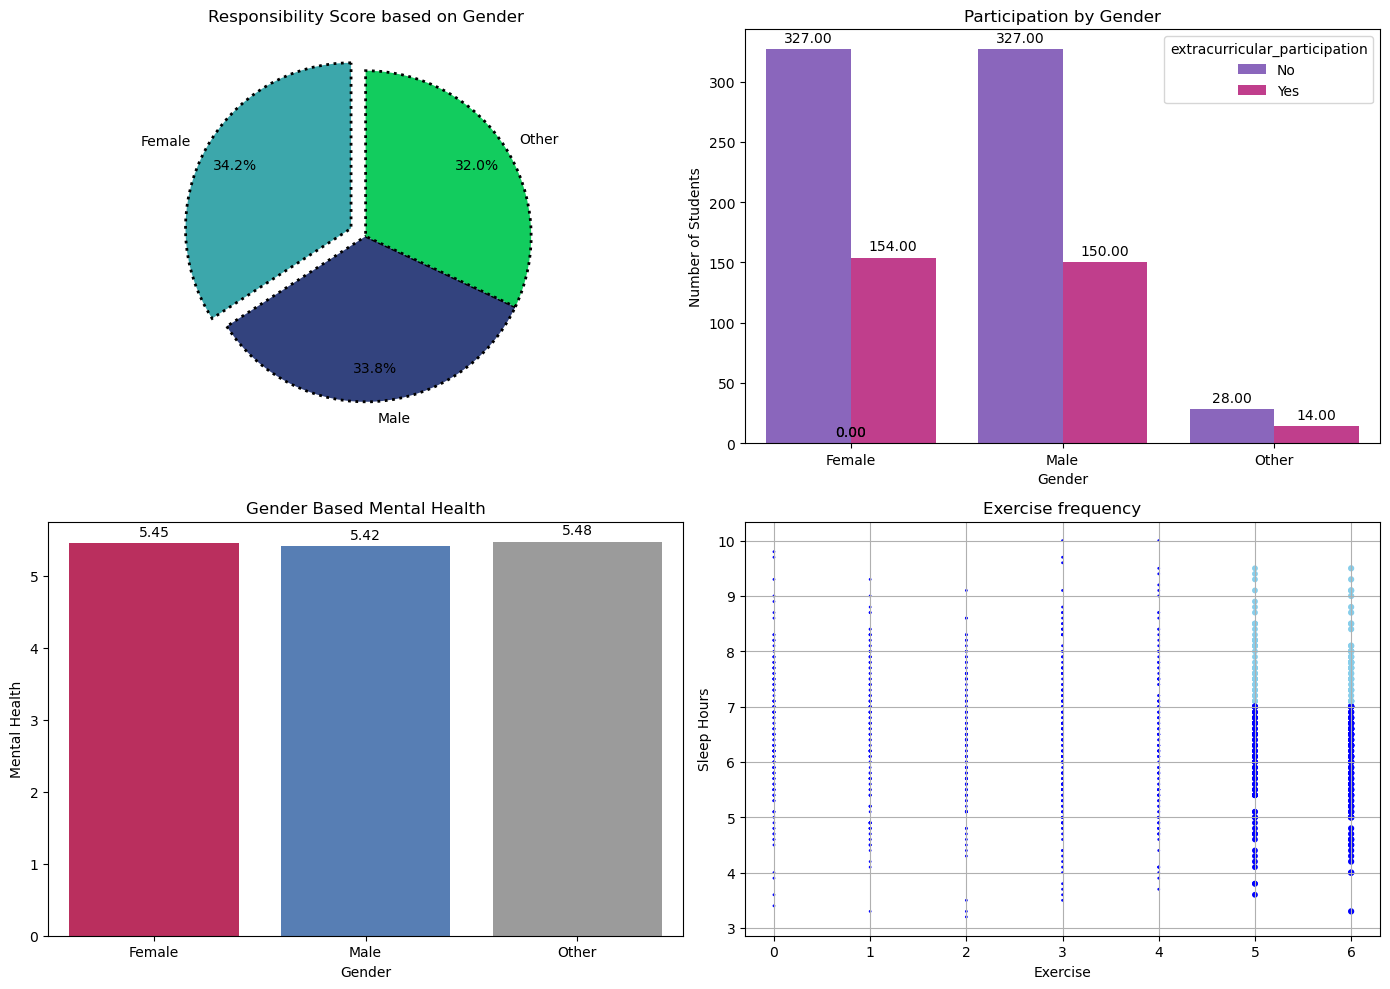

In [83]:
labels = ["Female", "Male", "Other"]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
plt.style.use('seaborn-v0_8-bright')

# ----------- 1 pie plot ----------- #
colors = ['#3ca7ab', '#33437e', '#12cc5e']
axes[0, 0].pie(
    gender_sumry['Responsibility_score'],
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor':'black', 'linewidth':2, 'linestyle':':'},
    explode=[0.1, 0, 0],
    pctdistance=0.8,
    labeldistance=1.1,
    colors = colors
)
axes[0, 0].set_title("Responsibility Score based on Gender")

# ----------- 2 sns bar plot ----------- #
colors = ["#8858ca", "#d62891"]
sns.barplot(
    data=result,
    x='gender',
    y='Count',
    hue='extracurricular_participation',
    ax=axes[0, 1],
    palette=colors
)
axes[0, 1].set_title('Participation by Gender')
axes[0, 1].set_ylabel('Number of Students')
axes[0, 1].set_xlabel('Gender')

for p in axes[0, 1].patches:
    axes[0, 1].annotate(
        format(p.get_height(), '.2f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        xytext=(0, 8),
        textcoords='offset points'
    )

# ----------- 3 sns bar plot ----------- #
gender_palette = {
    "Female":"#d11856",
    "Male":"#487cc3",
    "Other":"#9b9b9b"
}

sns.barplot(
    data=gender_hlt,
    x='gender',
    y='mental_health_rating',
    ax=axes[1, 0],
    palette=gender_palette
)
axes[1, 0].set_title("Gender Based Mental Health")
axes[1, 0].set_ylabel("Mental Health")
axes[1, 0].set_xlabel("Gender")

for p in axes[1, 0].patches:
    axes[1, 0].annotate(
        format(p.get_height(), '.2f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        xytext=(0, 8),
        textcoords='offset points'
    )

# ----------- 4 Scatter plot ----------- #
size = [i*2 if i > 4 else i == i for i in df['exercise_frequency']]
color = ['skyblue' if freq > 4 and sleep > 7 else 'blue' 
         for freq, sleep in zip(df['exercise_frequency'], df['sleep_hours'])]

ax = axes[1, 1]
ax.scatter(df['exercise_frequency'], df['sleep_hours'],
          c = color,
          s = size)
ax.set_title("Exercise frequency")
ax.set_xlabel("Exercise")
ax.set_ylabel("Sleep Hours")
ax.grid(True)

plt.tight_layout()
plt.show()


### Based on Gender:
If we assume that **High Marks** & **Low Screen time** is a high responsible gender form this dataset. The we found the **females are slightly _more responsible that Males and Others_**. But this is a very major gap so we cannot conclude anything based on this insight. Where are we can see there is no difference between gender based mental helath. And **_extracurricular participation is same for males and females_** but others lake this thing.

---